In [1]:
library(edgeR)
library(ggplot2)

Loading required package: limma



# Load the data

In [2]:
expression <- read.csv('data/enrichment_analysis/expression.csv', header=TRUE, row.names=1)
head(expression)

,X4341_BA46_AST.FB,X5387_BA9_AST.FB,X5408_PFC_Nova_AST.FB,X5538_PFC_Nova_AST.FB,X5577_BA9_AST.FB,X5879_PFC_Nova_AST.FB,X5893_PFC_AST.FB,X5936_PFC_Nova_AST.FB,X5958_BA9_AST.FB,X5976_BA9_AST.FB,⋯,X4341_BA46_Oligodendrocytes,X5387_BA9_Oligodendrocytes,X5408_PFC_Nova_Oligodendrocytes,X5538_PFC_Nova_Oligodendrocytes,X5577_BA9_Oligodendrocytes,X5879_PFC_Nova_Oligodendrocytes,X5893_PFC_Oligodendrocytes,X5936_PFC_Nova_Oligodendrocytes,X5958_BA9_Oligodendrocytes,X5976_BA9_Oligodendrocytes
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
MAGEH1,0.016393443,0.045602606,0.0234375,0.00000000,0.03361345,0.01,0.04123711,0.00000000,0.01515152,0.01282051,⋯,0.060301508,0.050997783,0.06688963,0.077720207,0.061991870,0.063694268,0.079594790,0.024691358,0.04979253,0
CTB-129P6.11,0.000000000,0.006514658,0.0078125,0.00000000,0.00000000,0.00,0.01030928,0.02631579,0.00000000,0.00000000,⋯,0.002010050,0.002217295,0.00000000,0.012435233,0.006097561,0.006369427,0.006512301,0.004115226,0.00000000,0
RP11-206L10.1,0.000000000,0.000000000,0.0000000,0.00000000,0.00000000,0.00,0.00000000,0.00000000,0.00000000,0.00000000,⋯,0.000000000,0.000000000,0.00000000,0.000000000,0.000000000,0.000000000,0.000000000,0.000000000,0.00000000,0
LGALS16,0.000000000,0.000000000,0.0000000,0.00000000,0.00000000,0.00,0.00000000,0.00000000,0.00000000,0.00000000,⋯,0.000000000,0.000000000,0.00000000,0.000000000,0.000000000,0.000000000,0.000000000,0.000000000,0.00000000,0
AC012322.1,0.008196721,0.000000000,0.0000000,0.01960784,0.00000000,0.01,0.00000000,0.00000000,0.00000000,0.00000000,⋯,0.004020101,0.002217295,0.01003344,0.004145078,0.002032520,0.000000000,0.004341534,0.004115226,0.00000000,0
SETDB2,0.008196721,0.013029316,0.0000000,0.09803922,0.06722689,0.04,0.02061856,0.02631579,0.01515152,0.01282051,⋯,0.021105528,0.019955654,0.03010033,0.023834197,0.019308943,0.050955414,0.032561505,0.020576132,0.01659751,0


In [3]:
annotation <- read.csv("data/enrichment_analysis/annotation.csv", header=TRUE, row.names=1)
#annotation <- annotation[row.names(expression),]
head(annotation)

,sample,cluster,individual,region,age,sex,diagnosis,Capbatch,Seqbatch,post.mortem.interval..hours.,RNA.Integrity.Number,psbulk_cells,psbulk_counts
,<chr>,<chr>,<int>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<int>,<dbl>,<dbl>,<dbl>
4341_BA46_AST-FB,4341_BA46,AST-FB,4341,PFC,13,M,Control,CB6,SB2,16,7.2,122,113187
5387_BA9_AST-FB,5387_BA9,AST-FB,5387,PFC,12,M,Control,CB6,SB2,13,7.6,307,287786
5408_PFC_Nova_AST-FB,5408_PFC_Nova,AST-FB,5408,PFC,6,M,Control,CB1,SB1,16,7.5,128,138276
5538_PFC_Nova_AST-FB,5538_PFC_Nova,AST-FB,5538,PFC,19,F,Control,CB2,SB1,24,8.3,51,109923
5577_BA9_AST-FB,5577_BA9,AST-FB,5577,PFC,21,M,Control,CB6,SB2,19,8.6,119,130212
5879_PFC_Nova_AST-FB,5879_PFC_Nova,AST-FB,5879,PFC,15,M,Control,CB1,SB1,18,7.5,100,114106


## Prepare the data

Factor the data

In [4]:
annotation$individual <- factor(annotation$individual)
annotation$region <- factor(annotation$region)
annotation$cluster <- factor(annotation$cluster)
head(annotation)

,sample,cluster,individual,region,age,sex,diagnosis,Capbatch,Seqbatch,post.mortem.interval..hours.,RNA.Integrity.Number,psbulk_cells,psbulk_counts
,<chr>,<fct>,<fct>,<fct>,<int>,<chr>,<chr>,<chr>,<chr>,<int>,<dbl>,<dbl>,<dbl>
4341_BA46_AST-FB,4341_BA46,AST-FB,4341,PFC,13,M,Control,CB6,SB2,16,7.2,122,113187
5387_BA9_AST-FB,5387_BA9,AST-FB,5387,PFC,12,M,Control,CB6,SB2,13,7.6,307,287786
5408_PFC_Nova_AST-FB,5408_PFC_Nova,AST-FB,5408,PFC,6,M,Control,CB1,SB1,16,7.5,128,138276
5538_PFC_Nova_AST-FB,5538_PFC_Nova,AST-FB,5538,PFC,19,F,Control,CB2,SB1,24,8.3,51,109923
5577_BA9_AST-FB,5577_BA9,AST-FB,5577,PFC,21,M,Control,CB6,SB2,19,8.6,119,130212
5879_PFC_Nova_AST-FB,5879_PFC_Nova,AST-FB,5879,PFC,15,M,Control,CB1,SB1,18,7.5,100,114106


In [5]:
y <- DGEList(counts=expression, samples=annotation)

### Filtering and normalization

Let's check a summary table

In [6]:
summary(annotation)

    sample                 cluster      individual region         age       
 Length:169         AST-FB     : 10   4341   :17   PFC:169   Min.   : 4.00  
 Class :character   AST-PP     : 10   5387   :17             1st Qu.:12.00  
 Mode  :character   Endothelial: 10   5408   :17             Median :15.00  
                    IN-PV      : 10   5538   :17             Mean   :14.56  
                    IN-SST     : 10   5577   :17             3rd Qu.:19.00  
                    IN-SV2C    : 10   5879   :17             Max.   :22.00  
                    (Other)    :109   (Other):67                            
     sex             diagnosis           Capbatch           Seqbatch        
 Length:169         Length:169         Length:169         Length:169        
 Class :character   Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character   Mode  :character  
                                                                            

In [7]:
keep.genes <- filterByExpr(y, group=y$samples$cluster, min.count=0.05, min.total.count=1)
table(keep.genes)

keep.genes
FALSE  TRUE 
23919 14741 

In [8]:
y <- y[keep.genes, , keep=FALSE]

In [9]:
y <- normLibSizes(y)
head(y$samples, n=10L)

,group,lib.size,norm.factors,sample,cluster,individual,region,age,sex,diagnosis,Capbatch,Seqbatch,post.mortem.interval..hours.,RNA.Integrity.Number,psbulk_cells,psbulk_counts
,<fct>,<dbl>,<dbl>,<chr>,<fct>,<fct>,<fct>,<int>,<chr>,<chr>,<chr>,<chr>,<int>,<dbl>,<dbl>,<dbl>
X4341_BA46_AST.FB,1,910.1393,1.0828310,4341_BA46,AST-FB,4341,PFC,13,M,Control,CB6,SB2,16,7.2,122,113187
X5387_BA9_AST.FB,1,922.1498,0.9932942,5387_BA9,AST-FB,5387,PFC,12,M,Control,CB6,SB2,13,7.6,307,287786
X5408_PFC_Nova_AST.FB,1,1056.4844,1.0663248,5408_PFC_Nova,AST-FB,5408,PFC,6,M,Control,CB1,SB1,16,7.5,128,138276
X5538_PFC_Nova_AST.FB,1,2099.8627,0.9842323,5538_PFC_Nova,AST-FB,5538,PFC,19,F,Control,CB2,SB1,24,8.3,51,109923
X5577_BA9_AST.FB,1,1073.5714,1.0594039,5577_BA9,AST-FB,5577,PFC,21,M,Control,CB6,SB2,19,8.6,119,130212
X5879_PFC_Nova_AST.FB,1,1112.1200,1.1202563,5879_PFC_Nova,AST-FB,5879,PFC,15,M,Control,CB1,SB1,18,7.5,100,114106
X5893_PFC_AST.FB,1,1318.4845,1.0572137,5893_PFC,AST-FB,5893,PFC,19,M,Control,CB2,SB1,11,8.0,97,130865
X5936_PFC_Nova_AST.FB,1,1184.6842,1.3164200,5936_PFC_Nova,AST-FB,5936,PFC,14,F,Control,CB1,SB1,23,8.0,38,46163
X5958_BA9_AST.FB,1,1016.2879,1.1074349,5958_BA9,AST-FB,5958,PFC,22,M,Control,CB7,SB2,24,7.6,66,68305


In [10]:
summary(y$samples$norm.factors)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.7637  0.8742  0.9253  1.0398  1.0594  3.6363 

### Data exploration

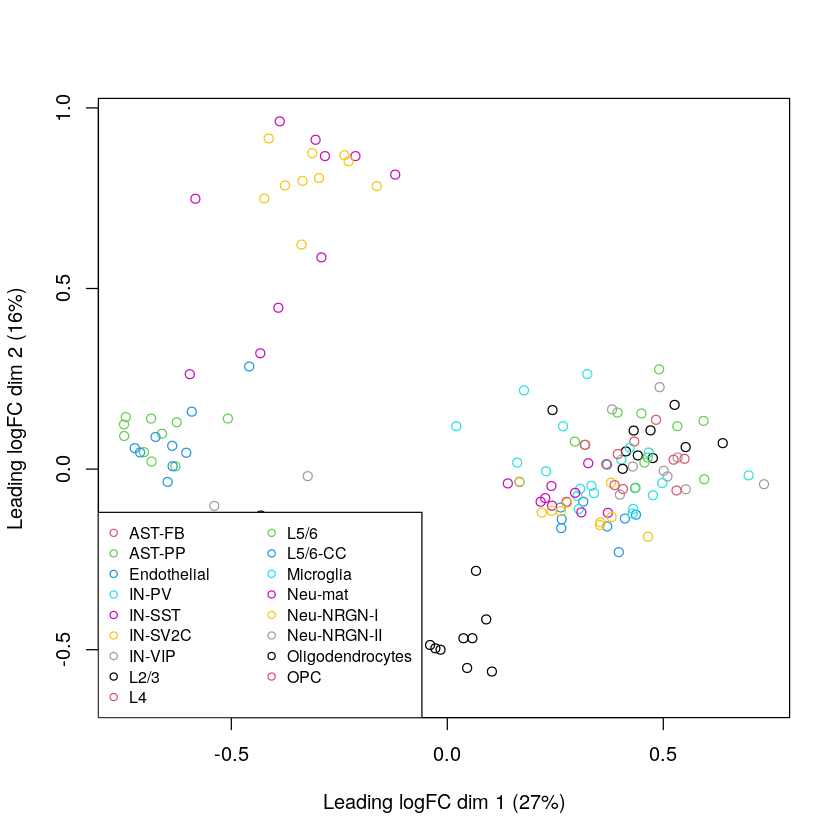

In [11]:
cluster <- as.factor(y$samples$cluster)
plotMDS(y, col=cluster, pch=1)
legend("bottomleft", legend=levels(cluster), pch=1, col=c(2:18), cex=0.8, ncol=2)

### Design matrix

In [12]:
cluster <- as.factor(y$samples$cluster)
individual <- as.factor(y$samples$individual)

design <- model.matrix(~ 0 + cluster + individual)
colnames(design) <- gsub("individual", "", colnames(design))
colnames(design) <- gsub("cluster", "", colnames(design))
head(design)

,AST-FB,AST-PP,Endothelial,IN-PV,IN-SST,IN-SV2C,IN-VIP,L2/3,L4,L5/6,⋯,OPC,5387,5408,5538,5577,5879,5893,5936,5958,5976
1,1,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,⋯,0,1,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,⋯,0,0,1,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,⋯,0,0,0,1,0,0,0,0,0,0
5,1,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,1,0,0,0,0,0
6,1,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,1,0,0,0,0


### Dispersion estimation

In [13]:
y <- estimateDisp(y, design, robust=TRUE)
y$common.dispersion

[1] 0.0002542433

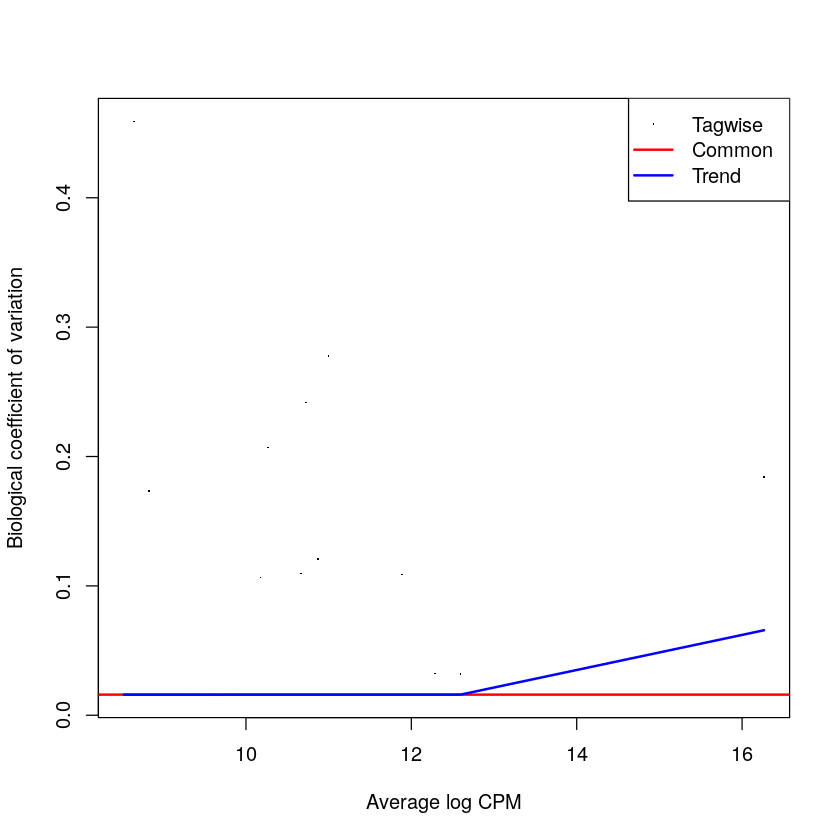

In [14]:
plotBCV(y)

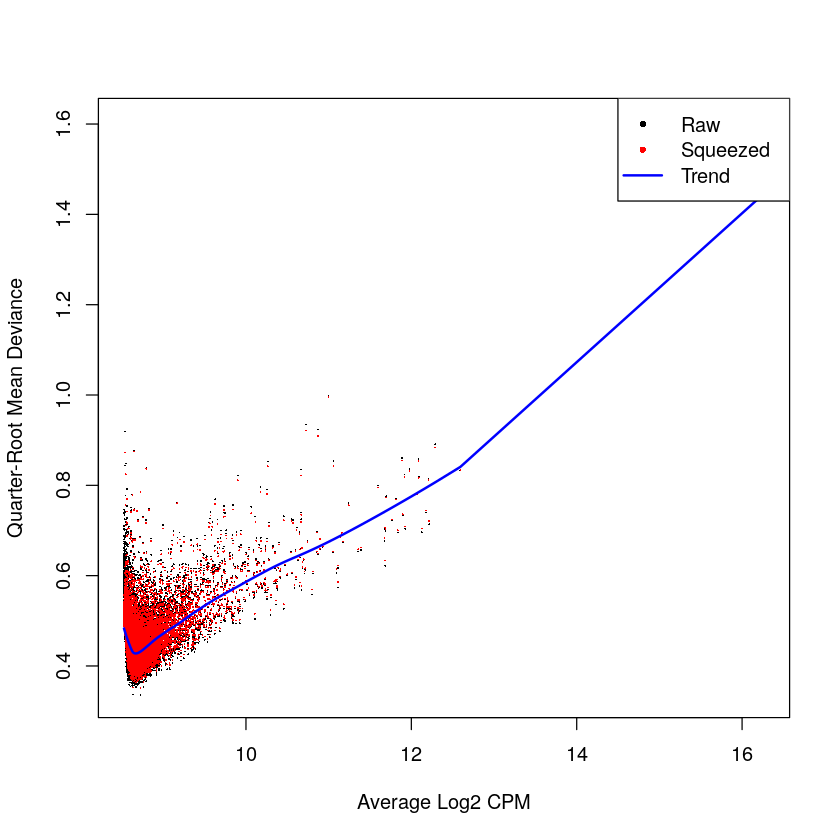

In [15]:
fit <- glmQLFit(y, design, robust=TRUE, legacy=FALSE)
plotQLDisp(fit)

### Marker genes identification

Make a contrast matrix

In [16]:
ncls <- nlevels(cluster)
contr <- rbind(
  matrix(1 / (1 - ncls), ncls, ncls),
  matrix(0, ncol(design) - ncls, ncls)
)
diag(contr) <- 1
rownames(contr) <- colnames(design)
colnames(contr) <- levels(cluster)
contr

,AST-FB,AST-PP,Endothelial,IN-PV,IN-SST,IN-SV2C,IN-VIP,L2/3,L4,L5/6,L5/6-CC,Microglia,Neu-mat,Neu-NRGN-I,Neu-NRGN-II,Oligodendrocytes,OPC
AST-FB,1.0000,-0.0625,-0.0625,-0.0625,-0.0625,-0.0625,-0.0625,-0.0625,-0.0625,-0.0625,-0.0625,-0.0625,-0.0625,-0.0625,-0.0625,-0.0625,-0.0625
AST-PP,-0.0625,1.0000,-0.0625,-0.0625,-0.0625,-0.0625,-0.0625,-0.0625,-0.0625,-0.0625,-0.0625,-0.0625,-0.0625,-0.0625,-0.0625,-0.0625,-0.0625
Endothelial,-0.0625,-0.0625,1.0000,-0.0625,-0.0625,-0.0625,-0.0625,-0.0625,-0.0625,-0.0625,-0.0625,-0.0625,-0.0625,-0.0625,-0.0625,-0.0625,-0.0625
IN-PV,-0.0625,-0.0625,-0.0625,1.0000,-0.0625,-0.0625,-0.0625,-0.0625,-0.0625,-0.0625,-0.0625,-0.0625,-0.0625,-0.0625,-0.0625,-0.0625,-0.0625
IN-SST,-0.0625,-0.0625,-0.0625,-0.0625,1.0000,-0.0625,-0.0625,-0.0625,-0.0625,-0.0625,-0.0625,-0.0625,-0.0625,-0.0625,-0.0625,-0.0625,-0.0625
IN-SV2C,-0.0625,-0.0625,-0.0625,-0.0625,-0.0625,1.0000,-0.0625,-0.0625,-0.0625,-0.0625,-0.0625,-0.0625,-0.0625,-0.0625,-0.0625,-0.0625,-0.0625
IN-VIP,-0.0625,-0.0625,-0.0625,-0.0625,-0.0625,-0.0625,1.0000,-0.0625,-0.0625,-0.0625,-0.0625,-0.0625,-0.0625,-0.0625,-0.0625,-0.0625,-0.0625
L2/3,-0.0625,-0.0625,-0.0625,-0.0625,-0.0625,-0.0625,-0.0625,1.0000,-0.0625,-0.0625,-0.0625,-0.0625,-0.0625,-0.0625,-0.0625,-0.0625,-0.0625
L4,-0.0625,-0.0625,-0.0625,-0.0625,-0.0625,-0.0625,-0.0625,-0.0625,1.0000,-0.0625,-0.0625,-0.0625,-0.0625,-0.0625,-0.0625,-0.0625,-0.0625
L5/6,-0.0625,-0.0625,-0.0625,-0.0625,-0.0625,-0.0625,-0.0625,-0.0625,-0.0625,1.0000,-0.0625,-0.0625,-0.0625,-0.0625,-0.0625,-0.0625,-0.0625


In [17]:
qlf <- list()
for (i in 1:ncls) {
  qlf[[i]] <- glmQLFTest(fit, contrast=contr[,i])
  qlf[[i]]$comparison <- paste0(levels(cluster)[i], '_vs_others')
}

The top most significant DE genes for cluster L1

In [18]:
topTags(qlf[[1]], n=10L)

,logFC,logCPM,F,PValue,FDR
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
SLC1A2,4.395930,9.693593,1198.2895,2.101278e-93,3.097494e-89
GPR98,4.829822,9.044138,1219.6545,6.019835e-88,4.436919e-84
PTGDS,3.797510,9.108616,700.5597,6.076219e-75,2.985652e-71
C1orf61,2.952425,8.937112,594.1261,1.359392e-68,5.009701e-65
SLC1A3,4.358552,9.122723,601.8174,2.570727e-64,7.579018e-61
GLIS3,3.136791,8.836189,584.8906,1.051368e-62,2.583037e-59
MSI2,2.776042,9.095536,473.0193,4.993232e-60,1.051503e-56
MMD2,3.748933,8.783313,586.6710,1.442902e-59,2.658728e-56
COL5A3,4.393219,8.800413,676.8120,2.335715e-59,3.825641e-56


In [19]:
for (i in 1:ncls) {
  write.csv(topTags(qlf[[i]], n = Inf)$table,
            file=paste0('data/enrichment_analysis/degenes_', gsub('/', '.', levels(cluster)[i]), '.csv'))
}

The numbers of DE genes under each comparison

In [21]:
dt <- lapply(lapply(qlf, decideTests), summary)
dt.all <- do.call("cbind", dt)
dt.all

,AST-FB_vs_others,AST-PP_vs_others,Endothelial_vs_others,IN-PV_vs_others,IN-SST_vs_others,IN-SV2C_vs_others,IN-VIP_vs_others,L2/3_vs_others,L4_vs_others,L5/6_vs_others,L5/6-CC_vs_others,Microglia_vs_others,Neu-mat_vs_others,Neu-NRGN-I_vs_others,Neu-NRGN-II_vs_others,Oligodendrocytes_vs_others,OPC_vs_others
Down,809,1386,5396,1082,461,969,493,1308,694,939,997,1119,66,5089,2643,1011,565
NotSig,12306,10642,7677,9385,11115,10032,10917,8346,9735,9093,8445,11944,13709,7127,9944,11746,11682
Up,1626,2713,1668,4274,3165,3740,3331,5087,4312,4709,5299,1678,966,2525,2154,1984,2494


Let's make a nice heatmap

In [22]:
top <- 20
topMarkers <- list()
for (i in 1:ncls) {
  ord <- order(qlf[[i]]$table$PValue, decreasing=FALSE)
  up <- qlf[[i]]$table$logFC[ord] > 0
  topMarkers[[i]] <- rownames(y)[ord[up][1:top]]
}
topMarkers <- unique(unlist(topMarkers))

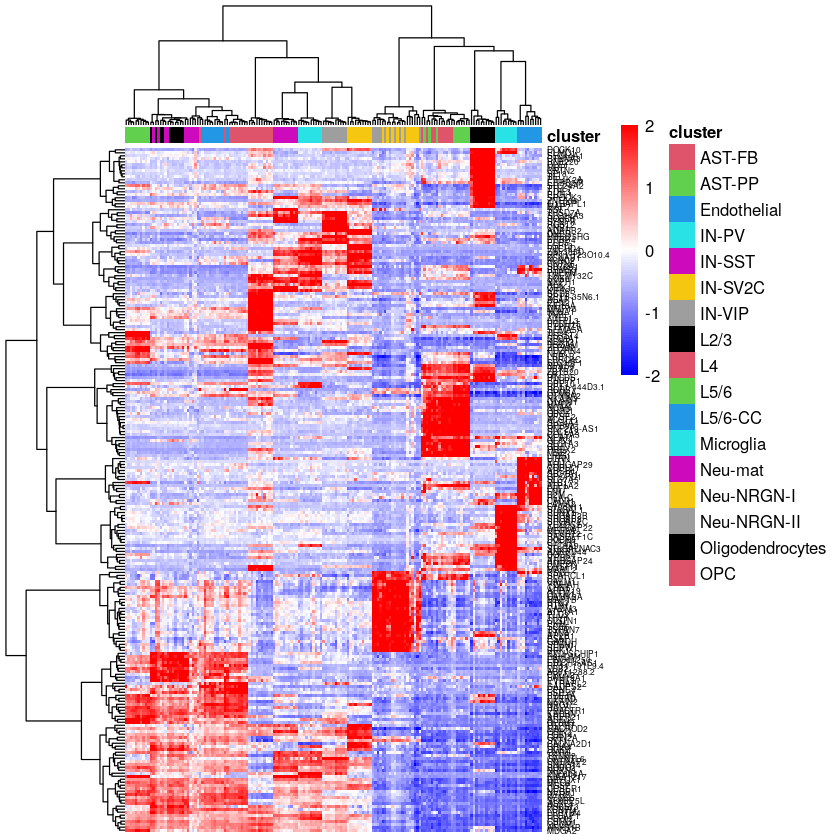

In [23]:
lcpm <- cpm(y, log=TRUE)
annot <- data.frame(cluster)
rownames(annot) <- colnames(y)
ann_colors <- list(cluster=2:18)
names(ann_colors$cluster) <- levels(cluster)
pheatmap::pheatmap(
  lcpm[topMarkers,],
  breaks=seq(-2,2,length.out=101),
  color=colorRampPalette(c("blue", "white", "red"))(100),
  scale="row",
  cluster_cols=TRUE,
  border_color=NA,
  fontsize_row=5,
  treeheight_row=70,
  treeheight_col=70,
  cuttree_cols=7,
  clustering_method="ward.D2",
  show_colnames=FALSE,
  annotation_col=annot,
  annotation_colors=ann_colors
)

In [24]:
sessionInfo()

R version 4.4.0 (2024-04-24)
Platform: x86_64-pc-linux-gnu
Running under: Ubuntu 22.04.4 LTS

Matrix products: default
BLAS:   /usr/lib/x86_64-linux-gnu/openblas-pthread/libblas.so.3 
LAPACK: /usr/lib/x86_64-linux-gnu/openblas-pthread/libopenblasp-r0.3.20.so;  LAPACK version 3.10.0

locale:
 [1] LC_CTYPE=en_US.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=en_US.UTF-8        LC_COLLATE=en_US.UTF-8    
 [5] LC_MONETARY=en_US.UTF-8    LC_MESSAGES=en_US.UTF-8   
 [7] LC_PAPER=en_US.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=en_US.UTF-8 LC_IDENTIFICATION=C       

time zone: Etc/UTC
tzcode source: system (glibc)

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

other attached packages:
[1] ggplot2_3.5.1 edgeR_4.4.2   limma_3.62.2 

loaded via a namespace (and not attached):
 [1] crayon_1.5.2       vctrs_0.6.5        cli_3.6.2          rlang_1.1.4       
 [5] gen